<a href="https://colab.research.google.com/github/Cralsic123/Abalone-Rings-Predictor/blob/main/Abalone_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [4]:
!pip install kaggle


In [6]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle competitions download -c playground-series-s4e4

  0% 0.00/2.41M [00:00<?, ?B/s]
100% 2.41M/2.41M [00:00<00:00, 158MB/s]


In [8]:
import zipfile
with zipfile.ZipFile('/content/playground-series-s4e4.zip', 'r') as zip_ref:
    zip_ref.extractall('./')



In [9]:
df = pd.read_csv("/content/train.csv")

In [10]:
df

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...,...
90610,90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6


In [11]:
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


Converting the gneder column to non infant and infant

In [27]:

def map_gender(gender):
    if gender == 'I':
        return 0
    else:
        return 1

df['Sex'] = df['Sex'].apply(map_gender)
#df.to_csv('modified_train.csv', index=False)


In [28]:
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,1,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,0,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,1,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,0,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [29]:
df.shape

(90615, 10)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  int64  
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 6.9 MB


In [31]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [32]:
df.describe()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.634796,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.481490,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.000000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,1.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,1.000000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [33]:
df['Rings'].value_counts()

Rings
9     17465
8     14499
10    12464
7      9008
11     8407
6      5411
12     4719
13     4074
5      2862
14     2507
15     2072
16     1439
4      1402
17     1175
18      848
19      639
20      507
3       386
21      255
23      180
22      108
27       41
2        29
24       29
1        25
29       24
25       22
26       18
Name: count, dtype: int64

In [56]:
df['Rings'].max()

29

In [34]:
x = df.drop(columns = 'Rings', axis =1)
y = df['Rings']

In [35]:
print(x)

          id  Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0          0    1   0.550     0.430   0.150        0.7715          0.3285   
1          1    1   0.630     0.490   0.145        1.1300          0.4580   
2          2    0   0.160     0.110   0.025        0.0210          0.0055   
3          3    1   0.595     0.475   0.150        0.9145          0.3755   
4          4    0   0.555     0.425   0.130        0.7820          0.3695   
...      ...  ...     ...       ...     ...           ...             ...   
90610  90610    1   0.335     0.235   0.075        0.1585          0.0685   
90611  90611    1   0.555     0.425   0.150        0.8790          0.3865   
90612  90612    0   0.435     0.330   0.095        0.3215          0.1510   
90613  90613    0   0.345     0.270   0.075        0.2000          0.0980   
90614  90614    0   0.425     0.325   0.100        0.3455          0.1525   

       Whole weight.2  Shell weight  
0              0.1465        0.2400  

In [36]:
print(y)

0        11
1        11
2         6
3        10
4         9
         ..
90610     6
90611     9
90612     6
90613     6
90614     8
Name: Rings, Length: 90615, dtype: int64


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [38]:
print (x.shape,x_train.shape,x_test.shape)

(90615, 9) (72492, 9) (18123, 9)


In [39]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

x_train_std = scaler.fit_transform(x_train)

x_test_std = scaler.transform(x_test)

In [42]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [60]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(9,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(30, activation='sigmoid')
])

In [61]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
history = model.fit(x_train_std, y_train, validation_split=0.1, epochs=20)

Epoch 1/20
2039/2039 [==============================] - 5s 2ms/step - loss: 1.9015 - accuracy: 0.3254 - val_loss: 1.7579 - val_accuracy: 0.3426
Epoch 2/20
2039/2039 [==============================] - 4s 2ms/step - loss: 1.7400 - accuracy: 0.3558 - val_loss: 1.7358 - val_accuracy: 0.3414
Epoch 3/20
2039/2039 [==============================] - 4s 2ms/step - loss: 1.7274 - accuracy: 0.3596 - val_loss: 1.7241 - val_accuracy: 0.3452
Epoch 4/20
2039/2039 [==============================] - 5s 2ms/step - loss: 1.7224 - accuracy: 0.3610 - val_loss: 1.7255 - val_accuracy: 0.3425
Epoch 5/20
2039/2039 [==============================] - 4s 2ms/step - loss: 1.7202 - accuracy: 0.3638 - val_loss: 1.7250 - val_accuracy: 0.3429
Epoch 6/20
2039/2039 [==============================] - 4s 2ms/step - loss: 1.7180 - accuracy: 0.3620 - val_loss: 1.7201 - val_accuracy: 0.3454
Epoch 7/20
2039/2039 [==============================] - 5s 2ms/step - loss: 1.7165 - accuracy: 0.3631 - val_loss: 1.7128 - val_accuracy:

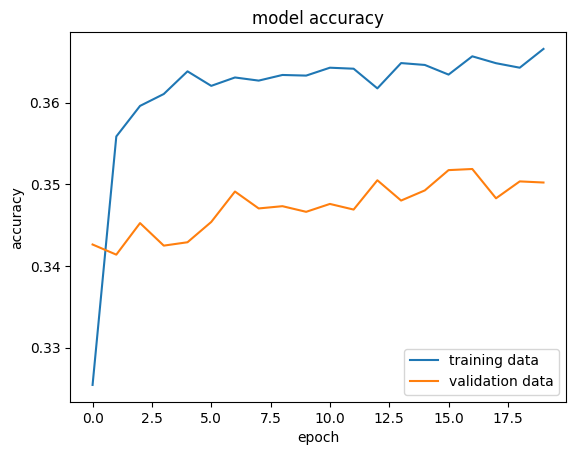

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

In [70]:
Y_pred = model.predict(x_test_std)

567/567 [==============================] - 2s 4ms/step


In [71]:
print(Y_pred.shape)
print(Y_pred[0])

(18123, 30)
[9.3955826e-08 1.5793290e-02 7.0709169e-02 4.6434483e-01 6.2624705e-01
 9.2896736e-01 9.3521482e-01 8.5739458e-01 5.0741798e-01 3.2573298e-01
 6.8407349e-02 2.0567404e-02 2.4649488e-02 1.8128294e-02 1.0531123e-02
 4.3671066e-03 7.5473702e-03 4.5457450e-03 2.1620526e-03 9.7606482e-04
 3.9391979e-03 3.0526918e-04 9.6812128e-04 1.3127776e-03 2.6353413e-31
 2.1451940e-10 6.0657512e-22 7.8780852e-19 1.0684713e-07 2.1950435e-05]


In [73]:
print(x_test_std)

[[-0.88926895 -1.32003068 -2.00505535 ... -1.46544924 -1.41793888
  -1.50589837]
 [ 0.62942155  0.75755815  0.02409591 ... -0.12425351  0.09979374
   0.11259148]
 [ 1.66895362  0.75755815  0.82730162 ...  0.49250072  1.3992903
   0.83918193]
 ...
 [-0.95383639 -1.32003068 -0.56773987 ... -0.927013   -1.06082532
  -0.9792164 ]
 [ 1.67204644  0.75755815  0.40456178 ...  0.34565448  0.48666676
   0.40092102]
 [-0.11980521  0.75755815 -1.11730167 ... -0.91722325 -1.09058479
  -1.06763746]]


In [74]:
print(Y_pred)

[[9.3955826e-08 1.5793290e-02 7.0709169e-02 ... 7.8780852e-19
  1.0684713e-07 2.1950435e-05]
 [1.4013799e-08 2.0839900e-03 6.1586841e-05 ... 6.1684102e-03
  1.5683639e-08 8.6594615e-03]
 [3.0321767e-09 7.5419439e-04 5.1954371e-06 ... 7.2794850e-03
  3.7231378e-09 8.1862649e-03]
 ...
 [3.4352954e-10 6.8475157e-03 5.8686482e-03 ... 1.0137647e-17
  5.9713595e-10 2.1857813e-06]
 [1.4743366e-08 6.3621388e-03 1.1512723e-03 ... 4.2663319e-03
  1.5304790e-08 5.6390204e-03]
 [3.4057235e-09 4.2313947e-03 9.8459320e-03 ... 3.4882114e-16
  3.2830390e-09 7.2129391e-05]]


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [77]:
lr=LinearRegression()

In [78]:
lr.fit(x_train,y_train)

LinearRegression()

In [80]:
y_pred=lr.predict(x_test)

In [81]:
r2_score(y_test,y_pred)

0.6095399648804579

In [82]:
test_data = pd.read_csv("test.csv")


In [83]:
def map_gender(gender):
    if gender == 'I':
        return 0
    else:
        return 1

test_data['Sex'] = test_data['Sex'].apply(map_gender)

In [84]:
predictions = lr.predict(test_data)

In [87]:
predictions = predictions.round().astype(int)

In [88]:
results_df = pd.DataFrame({'id': test_data['id'], 'Rings': predictions})


In [89]:
results_df.to_csv("predictions.csv", index=False)